In [9]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import math

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def nan_sum(arr):
    sum = 0
    for elem in arr:
        if not math.isnan(elem):
            sum += elem

In [10]:
shade_data = Table.read_table("URAP - Shade Data Clean.csv").relabel('Total Max of Total bryophyte cover', 'Overall bryophyte cover')
shade_data

Coordinates,Female total bryophyte cover,Male total bryophyte cover,S total bryophyte cover,Female average stem height,Male average stem height,S average stem height,Overall bryophyte cover,Total Average of Stem height
T1 105,nan,nan,0.05,3,nan,1.84444,0.05,1.96
T1 120,nan,nan,nan,nan,nan,nan,0,nan
T1 135,nan,nan,0.3,nan,nan,1.84,0.3,1.84
T1 15,nan,nan,nan,nan,nan,nan,0.1,nan
T1 150,nan,nan,0.075,nan,nan,1.1,0.075,1.1
T1 165,nan,nan,0.025,nan,nan,1.03,0.025,1.03
T1 180,nan,nan,0.1,nan,nan,1.47,0.1,1.47
T1 195,nan,nan,0.025,nan,nan,1.16,0.025,1.16
T1 210,nan,nan,0.2,nan,nan,1.54,0.2,1.54
T1 225,nan,nan,nan,nan,nan,nan,0,nan


In [11]:
(nan_sum(shade_data.column('Female total bryophyte cover')),nan_sum(shade_data.column('Male total bryophyte cover')) )

(None, None)

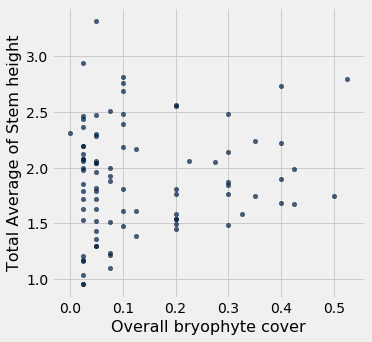

In [6]:
shade_data.scatter('Overall bryophyte cover', 'Total Average of Stem height')

In [7]:
fit(shade_data,'Overall bryophyte cover', 'Total Average of Stem height')

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [83]:
community_table = Table.read_table('community_RR_csv.csv').drop(26).drop(25).drop(24)

In [84]:
def M_or_F(x):
    if x in ['M','F']:
        return True
    else:
        return False

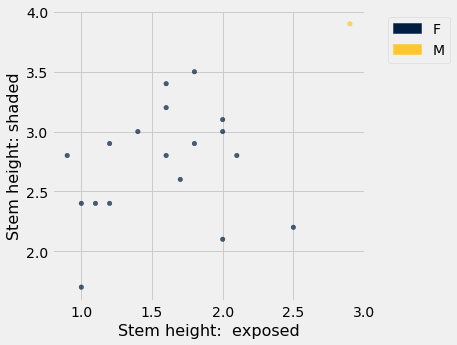

In [85]:
community_table.where('Sex (M,F,S)', M_or_F).scatter('Stem height:  exposed', 'Stem height: shaded', colors='Sex (M,F,S)')
# This has promise

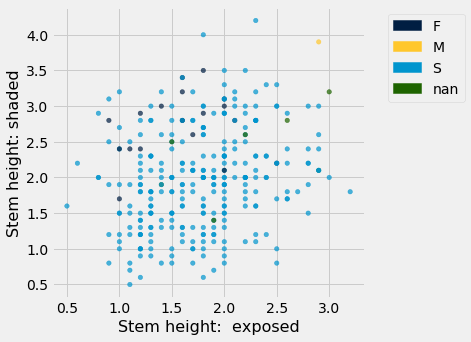

In [86]:
community_table.scatter('Stem height:  exposed', 'Stem height: shaded', colors='Sex (M,F,S)')
# This shows confounding factors

In [ ]:
def to_float(x):
    result = float(x.strip('%'))/100
    return result
total_bryophyte_cover = community_table.apply(to_float, 'Total bryophyte cover')
community_table = community_table.with_column('Total bryophyte cover (float)', total_bryophyte_cover)
community_table

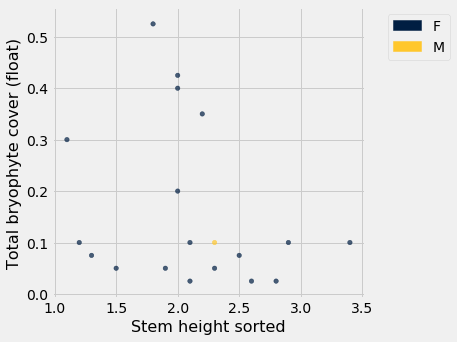

In [101]:
community_table.where('Sex (M,F,S)', M_or_F).scatter('Stem height sorted', 'Total bryophyte cover (float)', colors='Sex (M,F,S)')
#Possibly?

In [110]:
community_table.pivot('Sex (M,F,S)', 'Number of inflorescences').where('Number of inflorescences', are.above(0)).drop(3,4)

Number of inflorescences,F,M
1,105,9
2,16,0
3,4,0
4,1,0


Number of inflorescences could be a great parameter to use as a classifier feature. Need anthoner one that has l